In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

!ls

Mounted at /content/gdrive/
gdrive	sample_data


In [3]:
import os

home_dir = '/content/gdrive/My Drive/AChina'
# home_dir = '/hy-tmp'
os.chdir(home_dir)
!pwd

!pip install seaborn 
!pip install geopandas

from glob import glob
import csv

import pandas as pd
import geopandas as gpd

import numpy as np

import torch

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
import matplotlib.font_manager

plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False

/content/gdrive/My Drive/AChina
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!ls

dir = os.path.join(home_dir, 'rnn', '*.csv')

files = glob(dir)

print(files)

df = pd.DataFrame()

for ifile in files:
  df = pd.concat([df, pd.read_csv(ifile)])

df

china	    china_prl.csv	lightning_logs	       wheat.csv
china_old   corn_2002-2018.csv	rnn
china_old1  data		soybean_2002-2018.csv
china_old2  git.ipynb		wheat_2002-2018.csv
['/content/gdrive/My Drive/AChina/rnn/2011.csv', '/content/gdrive/My Drive/AChina/rnn/2012.csv', '/content/gdrive/My Drive/AChina/rnn/2013.csv', '/content/gdrive/My Drive/AChina/rnn/2016.csv', '/content/gdrive/My Drive/AChina/rnn/2009.csv', '/content/gdrive/My Drive/AChina/rnn/2014.csv', '/content/gdrive/My Drive/AChina/rnn/2010.csv', '/content/gdrive/My Drive/AChina/rnn/2015.csv', '/content/gdrive/My Drive/AChina/rnn/2007.csv', '/content/gdrive/My Drive/AChina/rnn/2017.csv', '/content/gdrive/My Drive/AChina/rnn/2008.csv']


,year,run_number,time_idx,RMSE,ME,MAPE,RMSE_GP,ME_GP,MAPE_GP
0,2011,1,32,0.073869,-0.014929,-0.040655,0.066023,-0.010808,-0.031905
1,2011,2,32,0.076198,-0.016508,-0.043085,0.068248,-0.011820,-0.033486
2,2011,3,32,0.077277,-0.018313,-0.045879,0.069043,-0.013401,-0.035971
3,2011,4,32,0.074552,-0.016337,-0.042639,0.067069,-0.011865,-0.033475
4,2011,5,32,0.075332,-0.011759,-0.036190,0.065933,-0.007481,-0.026864
...,...,...,...,...,...,...,...,...,...
1,2008,2,32,0.055268,0.000101,-0.005878,0.051327,0.003528,0.000229
2,2008,3,32,0.052639,-0.002973,-0.010127,0.048853,-0.000324,-0.005157
3,2008,4,32,0.055650,-0.003296,-0.010346,0.051382,0.000247,-0.004145
4,2008,5,32,0.056990,-0.002741,-0.010058,0.052679,0.000075,-0.004866


In [5]:
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
run_nums = 6

df = pd.DataFrame()

for year in years:
  for run_num in range(1, run_nums + 1, 1):
    files = glob(os.path.join(home_dir, 'rnn', f'{year}_{run_num}_*.tar'))
    print(files)
    model_information = torch.load(files[0], map_location=torch.device('cpu'))

    state = []
    countys = []
    for ii in range(0,len(model_information['test_indices']), 1):
      state.append( model_information['test_indices'][ii][0] )
      countys.append( model_information['test_indices'][ii][1] )
    df = pd.concat( [df, pd.DataFrame({'run_num':run_num, 'test_real':model_information['test_real'], 'test_pred_gp':model_information['test_pred_gp'], 'county':countys,'test_years':model_information['test_years']})] )

df


['/content/gdrive/My Drive/AChina/rnn/2007_1_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2007_2_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2007_3_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2007_4_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2007_5_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2007_6_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2008_1_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2008_2_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2008_3_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2008_4_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2008_5_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2008_6_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2009_1_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2009_2_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2009_3_32_gp.pth.tar']
['/content/gdrive/My Drive/AChina/rnn/2009_4_32_gp.pth.tar']
['/content/gdrive/My Dri

,run_num,test_real,test_pred_gp,county,test_years
0,1,0.826923,0.689344,0,2007
1,1,0.696787,0.687016,1,2007
2,1,0.678338,0.680261,2,2007
3,1,0.413333,0.409101,3,2007
4,1,0.764464,0.655194,5,2007
...,...,...,...,...,...
15,6,0.739051,0.891022,21,2017
16,6,0.640728,0.547107,23,2017
17,6,0.615134,0.595554,24,2017
18,6,0.762685,0.617664,26,2017


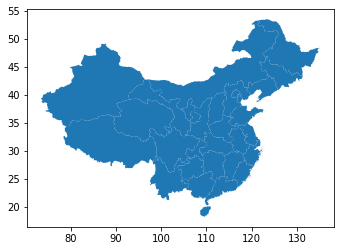

In [6]:
# df = df[ df['county'] != 20 ]
# df

dir = os.path.join(home_dir, 'wheat.csv')
shps = pd.read_csv(dir)

shps

from shapely import wkt

shps['geometry'] = shps['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(shps, crs='epsg:4326')
gdf

gdff = gdf[ gdf['Year'] == 2017 ]
gdff.plot()

# gdff = gdf[ gdf['County'].unique() ]

# gdff
# gdf.plot(edgecolor='k')
# gdf[0].plot()

20 [ 0  1  2  3  5  8  9 11 12 13 14 15 16 17 19 21 23 24 26 29]


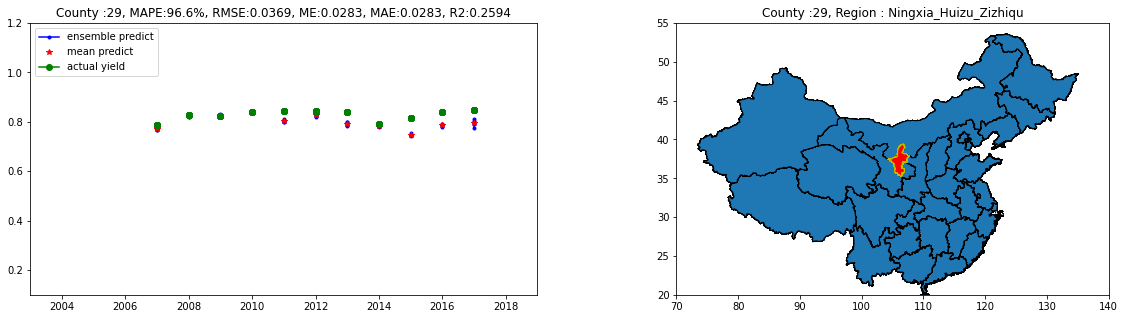

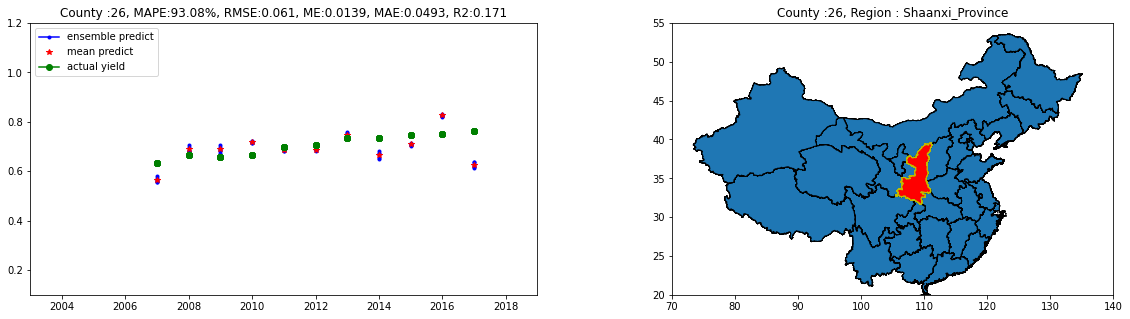

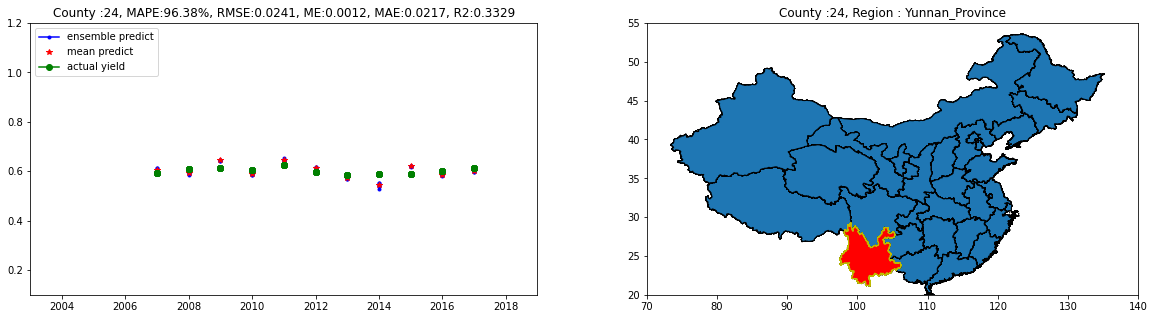

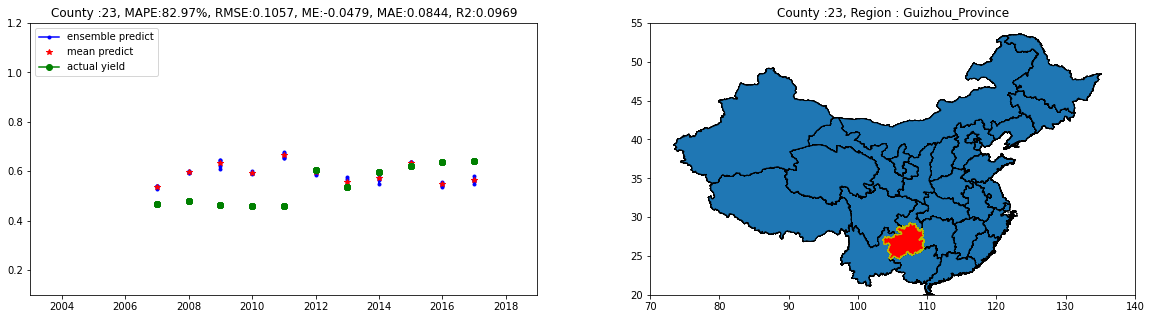

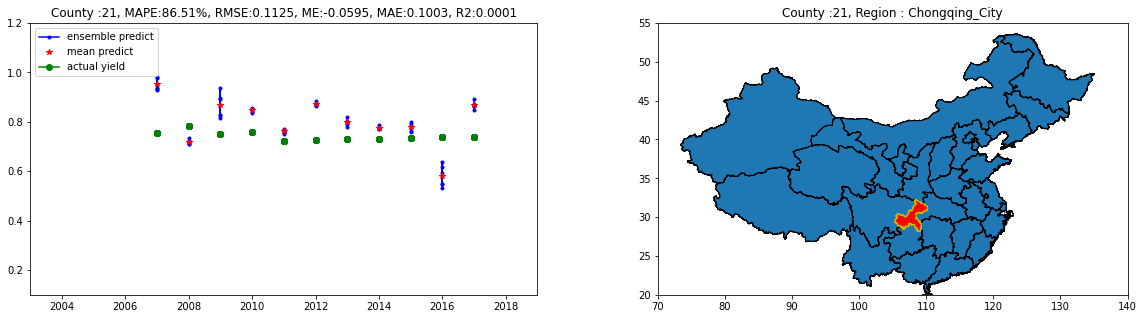

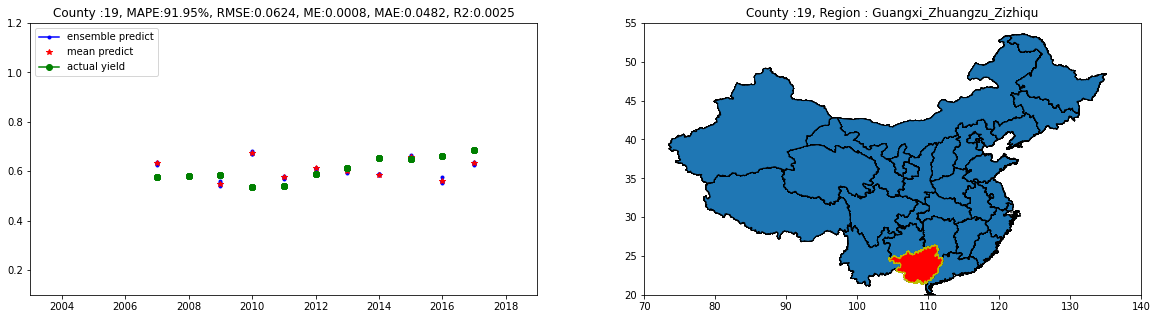

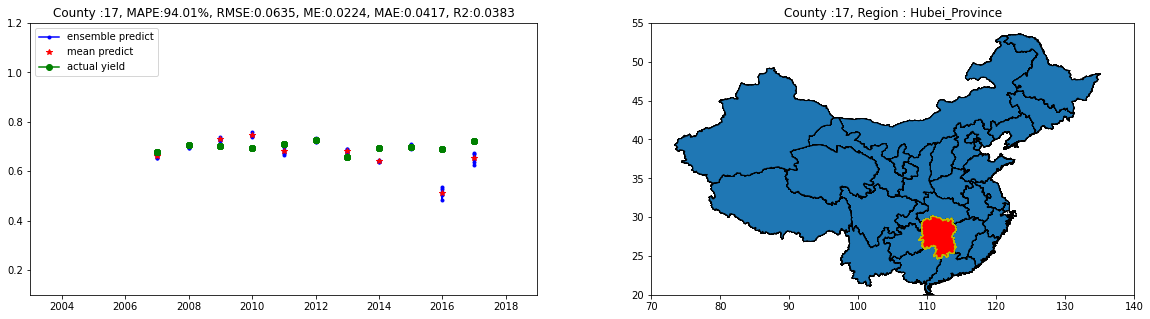

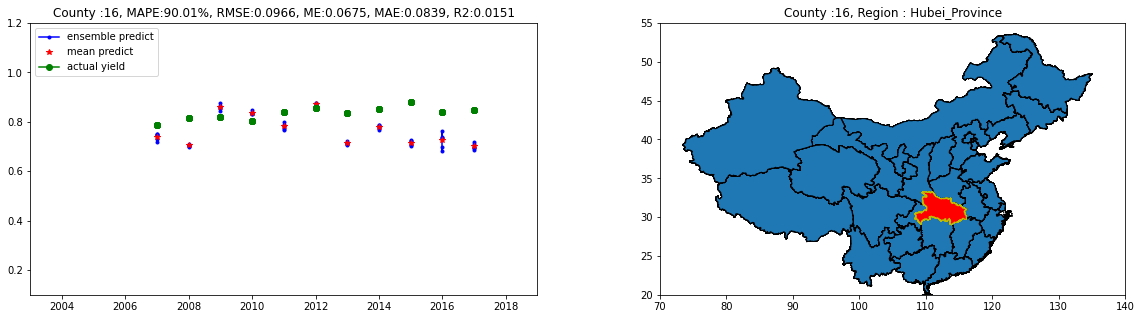

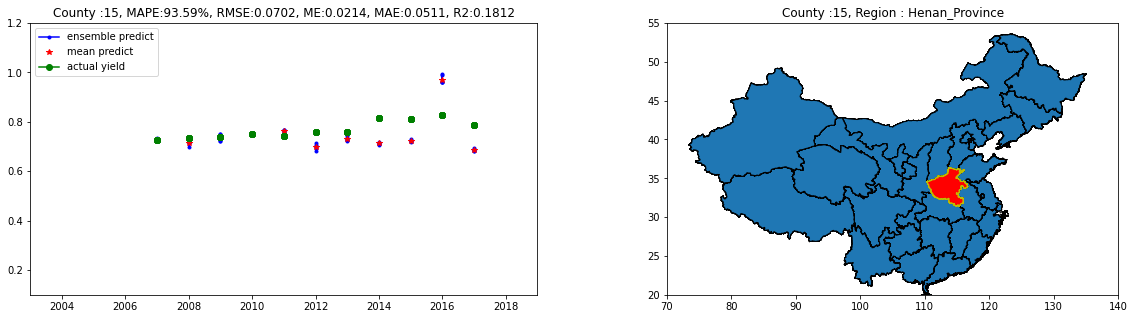

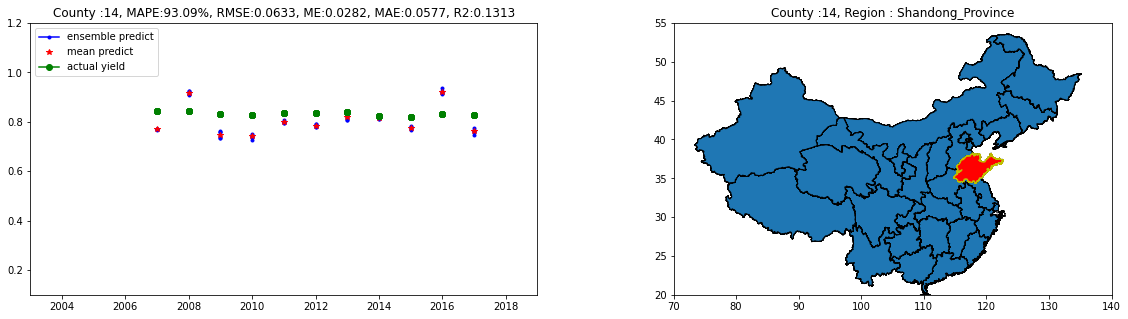

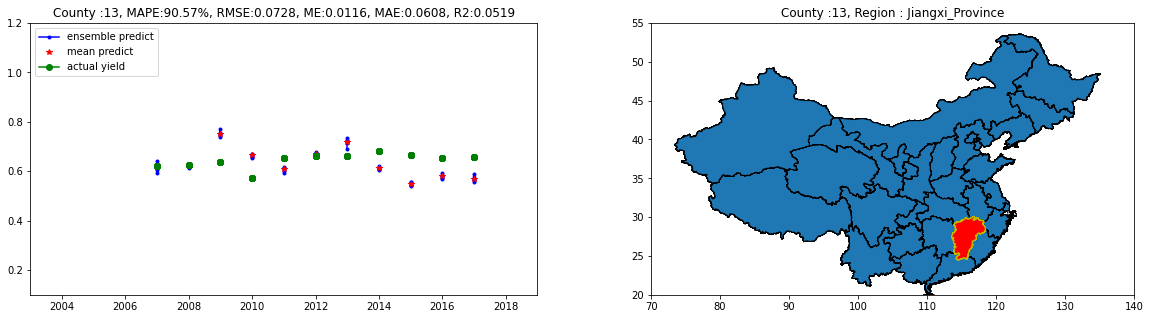

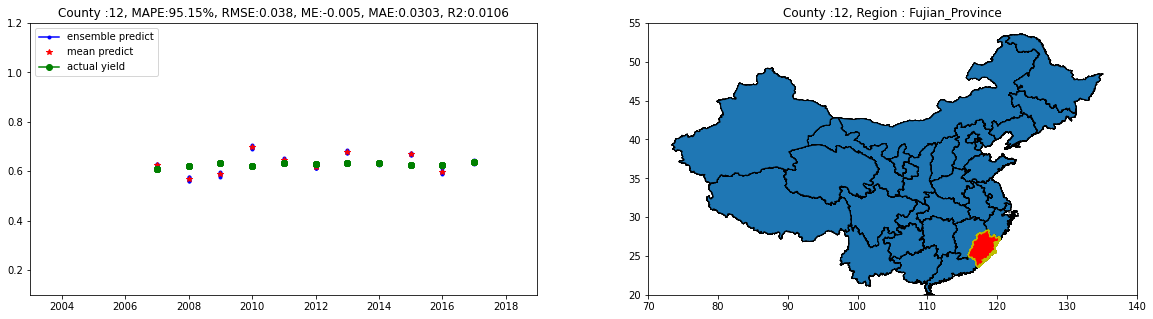

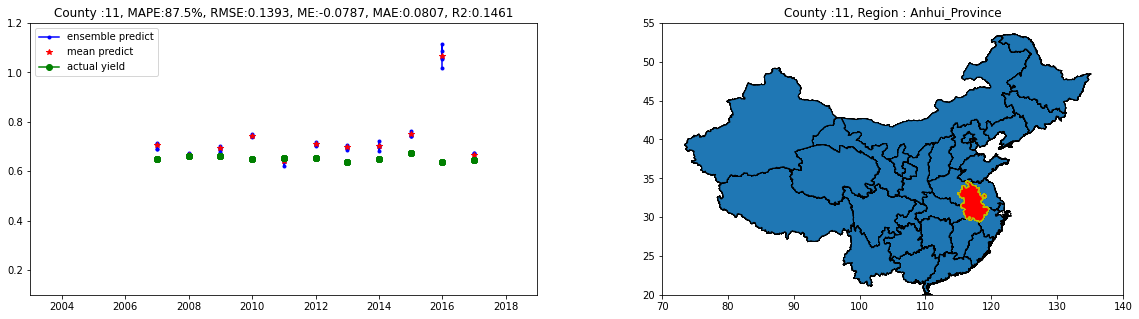

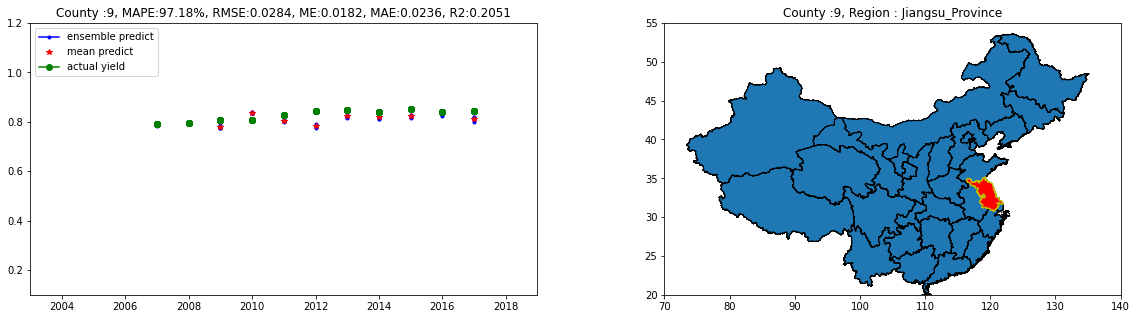

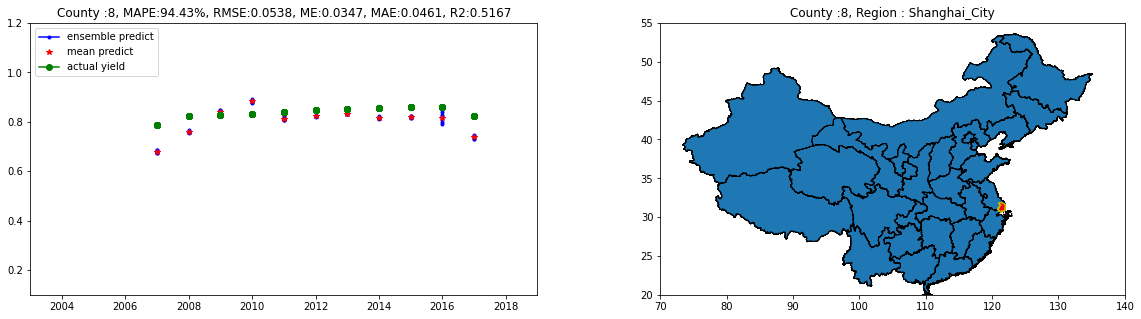

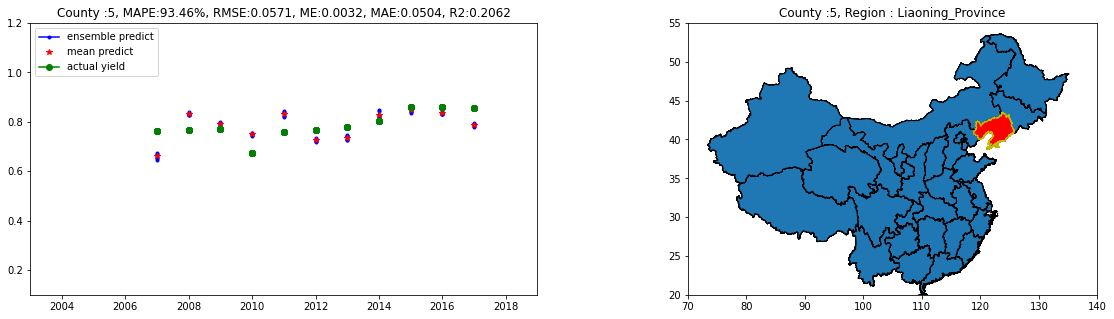

ValueError: ignored

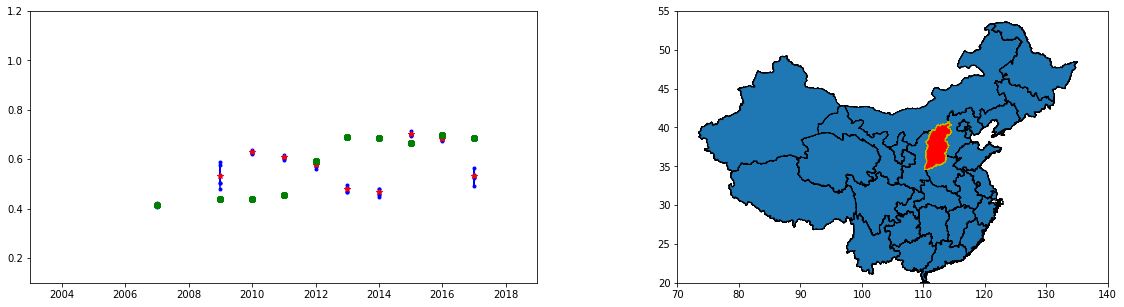

In [7]:
from pyparsing.helpers import PrecededBy
def analyze_results(true, pred, pred_gp):
    """Calculate ME and RMSE"""
    rmse = np.sqrt(np.mean((true - pred) ** 2)).round(4)
    me = np.mean(true - pred).round(4)
    mae = np.mean(np.abs(true - pred)).round(4)
    mape = 100 - np.mean( np.abs(true-pred) / true ).round(4) * 100
    # r2 = r2_score(true, pred)
    reg = LinearRegression().fit(true.reshape(-1, 1), pred.reshape(-1, 1))
    r2 = reg.score(true.reshape(-1, 1), pred.reshape(-1, 1))

    # print(f"Without GP: RMSE: {rmse}, ME: {me}, MAE:{mae} MAPE: {mape}")

    if pred_gp is not None:
        rmse_gp = np.sqrt(np.mean((true - pred_gp) ** 2))
        me_gp = np.mean(true - pred_gp)
        mape_gp = np.mean( np.abs(true-pred_gp) / true ) 
        print(f"With GP: RMSE: {rmse_gp}, ME: {me_gp}, MAPE:{mape_gp}")
        return rmse, me, mape, rmse_gp, me_gp, mape_gp
    return rmse, me, mae, mape, r2 

print(len(df['county'].unique()), df['county'].unique())
# fn

for county in np.sort(df['county'].unique())[::-1]:
  dff = df[ df['county'] == county]

  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
  ax1.set_ylim([0.1, 1.2])
  ax1.set_xlim([2003, 2019])
  ax2.set_ylim([20, 55])
  ax2.set_xlim([70, 140])
  mean_yield = []
  act_yield = []
  rdff = []
  for year in years:
    rdff = dff[ dff['test_years'] == year ]
    act_yield.append( np.mean(rdff['test_real']) )
    mean_yield.append( np.mean(rdff['test_pred_gp']) )
    ax1.plot(rdff['test_years'], rdff['test_pred_gp'], '.-', color='b', label='ensemble')
    ax1.plot(year, np.mean(rdff['test_pred_gp']), '*', color='r', label='mean')
    ax1.plot(rdff['test_years'], rdff['test_real'], 'o-', color='g', label='actual')
  gdf.plot(ax=ax2, edgecolor='k')
  gdff = gdf[ gdf['County'] == county]
  gdff.plot(ax=ax2, color='r', edgecolor='y')

  results = analyze_results(np.array(act_yield), np.array(mean_yield), None)
  ax1.set_title(f'County :{county}, MAPE:{results[3].round(4)}%, RMSE:{results[0]}, ME:{results[1]}, MAE:{results[2]}, R2:{results[4].round(4)}')
  # print(gdff['Region'].unique()[0], gdff['Region_Chinese'].unique()[0])
  region = gdff['Region'].unique()[0]
  # region_chinese = gdff['Region_Chinese'].unique()[0]
  ax2.set_title(f'County :{county}, Region : {region}')
  files = os.path.join(home_dir, 'rnn', f'{region}.png')
  # plt.savefig(files, bbox_inches='tight')
  ax1.legend(['ensemble predict', 'mean predict', 'actual yield'], loc='upper left')
  plt.savefig(files, bbox_inches='tight')
  plt.show()


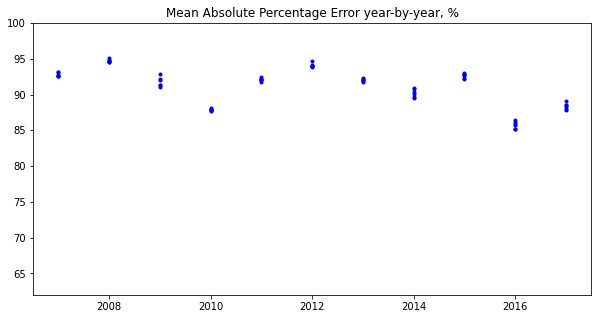

In [8]:
fig = plt.figure(figsize=(10,5))

mape_df = pd.DataFrame()

for year in years:
  for run_num in range(1, run_nums + 1, 1):
    dff = df[ df['test_years'] == year ]
    rdff = dff[ dff['run_num'] == run_num ]
    results = analyze_results(np.array(rdff['test_real']), np.array(rdff['test_pred_gp']), None)
    # print(year, run_num, results)
    plt.plot(year, (results[3]), '.', color='b')
    mape_df = pd.concat([mape_df, pd.DataFrame({ 'year':[year], 'mape':[results[3]] })])

    # ax1.set_ylim([0.1, 1.2])
plt.ylim([62, 100])
plt.title('Mean Absolute Percentage Error year-by-year, %')
files = os.path.join(home_dir, 'rnn', f'year-by-year.png')
plt.savefig(files, bbox_inches='tight')
plt.show()

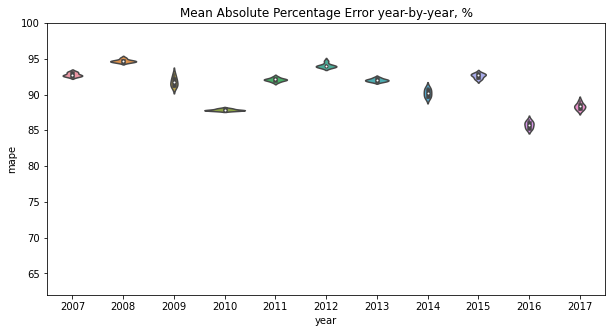

In [9]:
plt.figure(figsize=(10,5))
plt.ylim([62, 100])
sns.violinplot(data=mape_df, x='year', y='mape').set(title='Mean Absolute Percentage Error year-by-year, %')
files = os.path.join(home_dir, 'rnn', f'year-by-year_violin.png')
plt.savefig(files, bbox_inches='tight')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'scheme like as quantiles - Actual Yield for Wheat in Tonna per Ha for 2017 year')

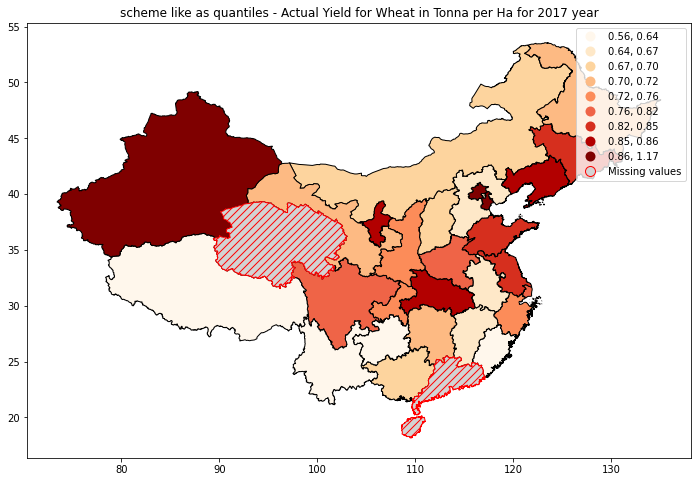

In [33]:
!pip install mapclassify

import mapclassify

fig, ax = plt.subplots(1, 1, figsize=(15,8))

gdff = gdf[ gdf['Year'] == 2017 ]
gdff.plot(ax=ax, column='Value', cmap='OrRd', edgecolor='k',
         legend=True, scheme="quantiles", k=9,
        #  legend_kwds={'label': "Actual Yield, Tons per Ha",
        #                 'orientation': "vertical"}, 
         missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },)

ax.set_title('scheme like as quantiles - Actual Yield for Wheat in Tonna per Ha for 2017 year')

Text(0.5, 1.0, 'scheme like as simple - Actual Yield for Wheat in Tonna per Ha for 2017 year')

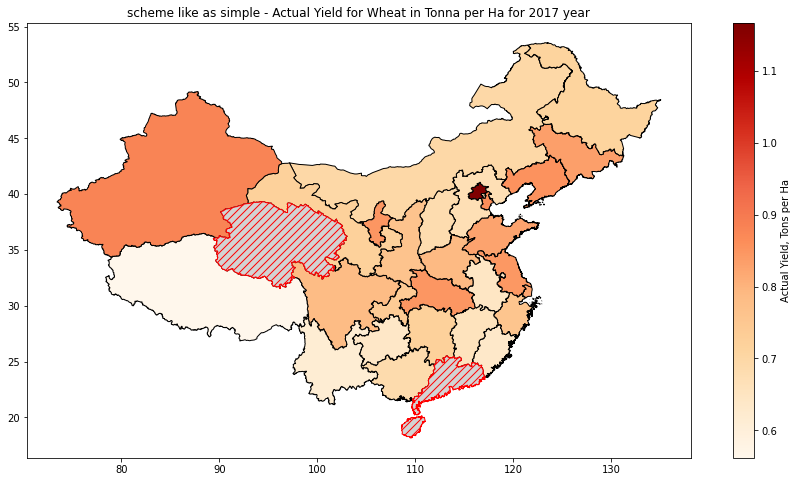

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

gdff = gdf[ gdf['Year'] == 2017 ]
gdff.plot(ax=ax, column='Value', cmap='OrRd', edgecolor='k',
         legend=True, 
         legend_kwds={'label': "Actual Yield, Tons per Ha",
                        'orientation': "vertical"}, 
         missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },)

ax.set_title('scheme like as simple - Actual Yield for Wheat in Tonna per Ha for 2017 year')